# Finding Geographic Locations of Headlines

## Adding Latitude and Longitude Coordinates

__Objective__: Find the geographic location of each headline in latitude and longitude coordinates from the city/country names. We will use these coordinates to perform clustering of geographically similar headlines in the next section.

__Workflow__:
1.	Load in the Pandas DataFrame with headline, countries, and cities.
    -	If a headline contains multiple cities/countries, decide which single one to keep.
2.	For each city/country, match the name to the latitude and longitude in geonamescache.
    -	You can use the function gc.get_cities_by_names(“city_name”).
    -	Some cities will return multiple matches with the previous function in different countries. You’ll have to decide which city to keep based on a heuristic (rule of thumb).
    -	If you have trouble, work with a single problematic city until you figure it out, then write a function to apply on all headlines.
3.	Add longitude and latitude coordinates to your DataFrame for each headline.
    -	It will be helpful to get the countrycode of each headline at this point.
    -	If you were not able to find many countries, think about dropping the column. You also need to decide what to do with headlines that have no coordinates. 
    -	You should end up with over 600 headlines that have geographic coordinates
    
__Deliverable__:

The deliverable is a Jupyter Notebook documenting your work as you add three additional columns to the DataFrame: longitude, latitude, and countrycode. We will use these coordinates to cluster the headlines in the next section. 

## Read Data into a DataFrame

You stored the headline, cities, and countries in a dataset.  
  
  Read the dataset as a pandas dataframe. Convert the missing values as `np.nan` as this will help removing these records later on. The example below assumes you saved your data as a json file.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_json("/Users/chen/Desktop/project3/headline_country_city.json")
df = df.replace({None: np.nan})
df.head()

,headline,country,city
0,Zika Outbreak Hits Miami,NaN,Miami
1,Could Zika Reach New York City?,NaN,New York City
2,First Case of Zika in Miami Beach,NaN,Miami
3,"Mystery Virus Spreads in Recife, Brazil",Brazil,Recife
4,Dallas man comes down with case of Zika,NaN,Dallas


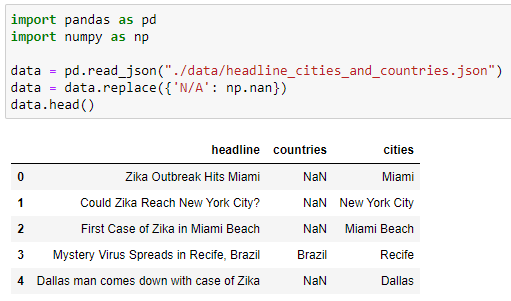

# Investigate the Data

We can start off using the `.describe()` method to understand our data.

#### (1) Make sure your data does not contain duplicates (headlines).

In [2]:
# CHECK FOR DUPLICATES
df.info()

# IF DUPLICATES ARE PRESENT REMOVE THEM
df = df.drop_duplicates()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 3 columns):
headline    650 non-null object
country     15 non-null object
city        608 non-null object
dtypes: object(3)
memory usage: 15.4+ KB


,headline,country,city
0,Zika Outbreak Hits Miami,NaN,Miami
1,Could Zika Reach New York City?,NaN,New York City
2,First Case of Zika in Miami Beach,NaN,Miami
3,"Mystery Virus Spreads in Recife, Brazil",Brazil,Recife
4,Dallas man comes down with case of Zika,NaN,Dallas
5,Trinidad confirms first Zika case,NaN,Trinidad
6,Zika Concerns are Spreading in Houston,NaN,Houston
7,Geneve Scientists Battle to Find Cure,NaN,Geneve
8,The CDC in Atlanta is Growing Worried,NaN,Atlanta
9,Zika Infested Monkeys in Sao Paulo,NaN,Sao Paulo


#### (2) Are there records with missing countries? What about missing cities?

Provide the count of records missing the country information and the ones missing city information.  
  
  **[HINT: A useful method for data investigation is `.info()`]**

In [3]:
# count the number of missing country and missing city respectively
print(df.country.isnull().sum())
print(df.city.isnull().sum())

632
42


### Exploratory Plots

Plots are a great way to visualize data. Let's take a look at the distribution of countries and cities.  
  
  #### (3) Generate a box plot of countries and cities

In [4]:
# GENERATE Bar PLOT OF COUNTRIES
import matplotlib.pyplot as plt
import seaborn as sns


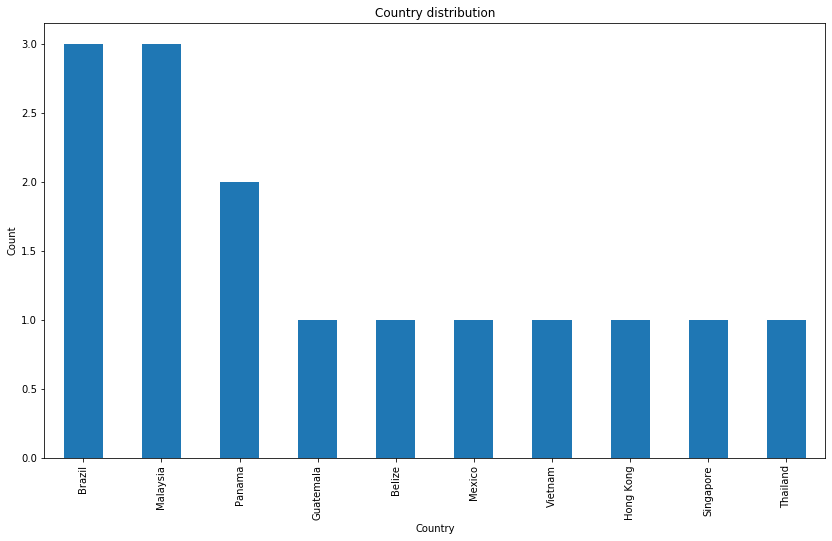

In [7]:
ax = df['country'].value_counts().plot(kind='bar',figsize=(14,8),title="Country distribution")
ax.set_xlabel("Country")
ax.set_ylabel("Count")
plt.show()

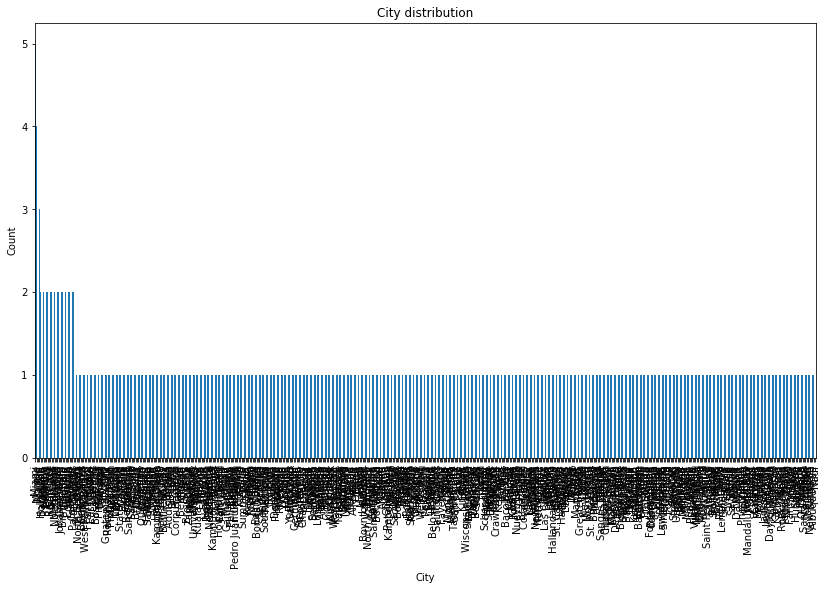

In [12]:
# GENERATE Bar PLOT OF CITIES
ax = df['city'].value_counts().plot(kind='bar',figsize=(14,8),title="City distribution")
ax.set_xlabel("City")
ax.set_ylabel("Count")
plt.show()

We have many more cities, so a bar plot might not be the best graphic.

#### (4) How many different countries and cities does your dataset contain?

In [13]:
# count the number of distinct country and city
df.apply(lambda x: len(x.dropna().unique()))

headline    647
country      10
city        568
dtype: int64

In [9]:
# Display (a print will be accepted) the number of different countries
# 10

In [10]:
# Display (a print will be accepted) the number of different cities
# 569

#### (5) Is there any particular city dominating the headline?

In [14]:
# FIND A WAY TO ANSWER THE QUESTION OF WHETHER THERE IS A CITY (FEW CITIES) DOMINATING THE HEADLINES
df["city"].value_counts()
# we can see that Miami dominates the headlines with 5 times

Miami           5
Monroe          4
Madrid          3
San             3
Hollywood       2
               ..
Toms River      1
New Kingston    1
Santa Fe        1
Albuquerque     1
Nadi            1
Name: city, Length: 568, dtype: int64

# Verifying cities
You might have notices that you might have matched cities like "of" or other weird names. This is because the geonames might contain doubious cities.  
  
  #### (6) Check them and make the decision of what to do with them.

# Add Latitude and Longitude for Each City

#### (7.a) You can now add the latitude and longitude for each city in the headlines. Do not add the country locations since there are a limited number of countries.

#### (7.b) Accented Names

For finding the cities, you will need to use accented city names. Create a new column containing the accented name the mapping from the previous deliverable.  
  
  The output should look like the following:  
    

In [15]:
%pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [16]:
import geonamescache
import unidecode

In [17]:
gc = geonamescache.GeonamesCache()
countries = [country["name"] for country in gc.get_countries().values()]
print(countries[:10])

cities = [city['name'] for city in gc.get_cities().values()]
print(cities[:10])
country_accent_mapping = {
    unidecode.unidecode(country): country for country in countries
}

city_accent_mapping = {
    unidecode.unidecode(city): city for city in cities
}

['Andorra', 'United Arab Emirates', 'Afghanistan', 'Antigua and Barbuda', 'Anguilla', 'Albania', 'Armenia', 'Angola', 'Antarctica', 'Argentina']
['Andorra la Vella', 'Umm Al Quwain City', 'Ras Al Khaimah City', 'Zayed City', 'Khawr Fakkān', 'Dubai', 'Dibba Al-Fujairah', 'Dibba Al-Hisn', 'Sharjah', 'Ar Ruways']


In [18]:
df["accented_city"] = df["city"].map(city_accent_mapping)
df

,headline,country,city,accented_city
0,Zika Outbreak Hits Miami,NaN,Miami,Miami
1,Could Zika Reach New York City?,NaN,New York City,New York City
2,First Case of Zika in Miami Beach,NaN,Miami,Miami
3,"Mystery Virus Spreads in Recife, Brazil",Brazil,Recife,Recife
4,Dallas man comes down with case of Zika,NaN,Dallas,Dallas
5,Trinidad confirms first Zika case,NaN,Trinidad,Trinidad
6,Zika Concerns are Spreading in Houston,NaN,Houston,Houston
7,Geneve Scientists Battle to Find Cure,NaN,Geneve,Genève
8,The CDC in Atlanta is Growing Worried,NaN,Atlanta,Atlanta
9,Zika Infested Monkeys in Sao Paulo,NaN,Sao Paulo,São Paulo


In [19]:
# check if the added column correct
accented_city_list=list(df['accented_city'])
accented_city_list

['Miami',
 'New York City',
 'Miami',
 'Recife',
 'Dallas',
 'Trinidad',
 'Houston',
 'Genève',
 'Atlanta',
 'São Paulo',
 'Brownsville',
 'St. Louis',
 'San Juan',
 'Galveston',
 'Manila',
 'Iloilo',
 'Los Angeles',
 nan,
 'Orlando',
 nan,
 'Chicago',
 'Tampa',
 'Flint',
 'Baltimore',
 'London',
 'Ho',
 'Philadelphia',
 'Boston',
 'Paris',
 'San Diego',
 'Bangkok',
 'Beijing',
 'Salvador',
 'Kuala Lumpur',
 'Yangon',
 'Tallahassee',
 'San Francisco',
 'Bethesda',
 'Townsville',
 'Mandaluyong City',
 'Santa Rosa',
 'San',
 'Cleveland',
 'Austin',
 'Piracicaba',
 'Lima',
 'Toronto',
 'Bogotá',
 nan,
 'Brisbane',
 'Dakar',
 'Havana',
 'Key West',
 'Vancouver',
 'Seattle',
 'Nashville',
 'Saint Croix',
 'Fort Collins',
 'Klang',
 'Guatemala City',
 'Madison',
 'Sarasota',
 'Entebbe',
 nan,
 'Brasília',
 'Jacksonville',
 'Shenzhen',
 'Caracas',
 'Quezon City',
 'Sydney',
 'Mumbai',
 'Pune',
 'Hanoi',
 nan,
 'Silver Spring',
 'Delhi',
 nan,
 'Belize City',
 'Campinas',
 'Soyapango',
 'Rome'

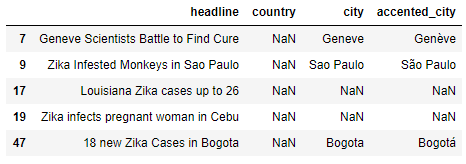

In [21]:
print(gc.get_cities_by_name('São Paulo'))

[{'3448439': {'geonameid': 3448439, 'name': 'São Paulo', 'latitude': -23.5475, 'longitude': -46.63611, 'countrycode': 'BR', 'population': 10021295, 'timezone': 'America/Sao_Paulo', 'admin1code': '27'}}]


As you can see there are several cases where the accented city does not match the original city.  
  
  With this information you can use the `get_cities_by_name(<accented city>)` method from the geonamescache library:  
  
  `print(gc.get_cities_by_name('São Paulo'))
  [{'3448439': {'geonameid': 3448439, 'name': 'São Paulo', 'latitude': -23.5475, 'longitude': -46.63611, 'countrycode': 'BR', 'population': 10021295, 'timezone': 'America/Sao_Paulo', 'admin1code': '27'}}]`

Here an example of the importance of using the accented names!

## Handling Duplicate Cities

There might be different cities with the same names and you have to do something about it.  
  
  Because an headline has is likely to consider larger cities you approach might be quite simple: **For each city with multiple entries in geonames, we'll choose the city with the greatest population.**
  
This may occassionally be wrong, but because headline is more likely to mention a larger city (by population) the error is quite small.

This sorts by the population of the cities descending (largest to smallest). If we take the first city, then we'll have the largest.

#### (7.c) Finding Geo-Information for Cities

Now you can find the geo-information of all the cities in the headlines. You will want to be careful to go through the accented city names. If there are multiple matches for a city, we'll take the largest city.  
  
  Add the geo-information to the dataset including the countrycode as in the following:

In [22]:
# initialize an empty list to store the city geo information
city_info = []
for city in df['accented_city']:
    des = gc.get_cities_by_name(city)
    if des:
        des = [{key: value for key, value in list(info.values())[0].items()} for info in des]    
        city_info.append({"name": des[0]['name'],
                    "latitude": des[0]["latitude"],
                    "longitude": des[0]["longitude"],
                    "countrycode": des[0]["countrycode"],
                    "pop": des[0]["population"],})

In [20]:
city_info

[{'name': 'Miami',
  'latitude': 25.77427,
  'longitude': -80.19366,
  'countrycode': 'US',
  'pop': 441003},
 {'name': 'New York City',
  'latitude': 40.71427,
  'longitude': -74.00597,
  'countrycode': 'US',
  'pop': 8175133},
 {'name': 'Miami',
  'latitude': 25.77427,
  'longitude': -80.19366,
  'countrycode': 'US',
  'pop': 441003},
 {'name': 'Recife',
  'latitude': -8.05389,
  'longitude': -34.88111,
  'countrycode': 'BR',
  'pop': 1478098},
 {'name': 'Dallas',
  'latitude': 32.78306,
  'longitude': -96.80667,
  'countrycode': 'US',
  'pop': 1300092},
 {'name': 'Trinidad',
  'latitude': -14.83333,
  'longitude': -64.9,
  'countrycode': 'BO',
  'pop': 84259},
 {'name': 'Houston',
  'latitude': 29.76328,
  'longitude': -95.36327,
  'countrycode': 'US',
  'pop': 2296224},
 {'name': 'Genève',
  'latitude': 46.20222,
  'longitude': 6.14569,
  'countrycode': 'CH',
  'pop': 183981},
 {'name': 'Atlanta',
  'latitude': 33.749,
  'longitude': -84.38798,
  'countrycode': 'US',
  'pop': 46387

In [23]:
#create another dataframe called city_info
city_info = pd.DataFrame(city_info)
city_info

,name,latitude,longitude,countrycode,pop
0,Miami,25.77427,-80.19366,US,441003
1,New York City,40.71427,-74.00597,US,8175133
2,Miami,25.77427,-80.19366,US,441003
3,Recife,-8.05389,-34.88111,BR,1478098
4,Dallas,32.78306,-96.80667,US,1300092
5,Trinidad,-14.83333,-64.90000,BO,84259
6,Houston,29.76328,-95.36327,US,2296224
7,Genève,46.20222,6.14569,CH,183981
8,Atlanta,33.74900,-84.38798,US,463878
9,São Paulo,-23.54750,-46.63611,BR,10021295


In [24]:
# drop duplicates
city_info = city_info.drop_duplicates()

You can test your dataset by making sure that city like `Boston` or `Rochester` are in the United States.

In [25]:
city_info[city_info['name'] == 'Boston']

,name,latitude,longitude,countrycode,pop
25,Boston,52.97633,-0.02664,GB,41340


In [26]:
# merge the city_info dataframes with the previous dataframe
df1 = pd.merge(
    df, city_info, left_on="accented_city", right_on="name", how="left"
)
df1

,headline,country,city,accented_city,name,latitude,longitude,countrycode,pop
0,Zika Outbreak Hits Miami,NaN,Miami,Miami,Miami,25.77427,-80.19366,US,441003.0
1,Could Zika Reach New York City?,NaN,New York City,New York City,New York City,40.71427,-74.00597,US,8175133.0
2,First Case of Zika in Miami Beach,NaN,Miami,Miami,Miami,25.77427,-80.19366,US,441003.0
3,"Mystery Virus Spreads in Recife, Brazil",Brazil,Recife,Recife,Recife,-8.05389,-34.88111,BR,1478098.0
4,Dallas man comes down with case of Zika,NaN,Dallas,Dallas,Dallas,32.78306,-96.80667,US,1300092.0
5,Trinidad confirms first Zika case,NaN,Trinidad,Trinidad,Trinidad,-14.83333,-64.90000,BO,84259.0
6,Zika Concerns are Spreading in Houston,NaN,Houston,Houston,Houston,29.76328,-95.36327,US,2296224.0
7,Geneve Scientists Battle to Find Cure,NaN,Geneve,Genève,Genève,46.20222,6.14569,CH,183981.0
8,The CDC in Atlanta is Growing Worried,NaN,Atlanta,Atlanta,Atlanta,33.74900,-84.38798,US,463878.0
9,Zika Infested Monkeys in Sao Paulo,NaN,Sao Paulo,São Paulo,São Paulo,-23.54750,-46.63611,BR,10021295.0


## More Data Cleaning
The country column does not give you much information and country code is probably more informative.  
  Drop the Country column.

In [27]:
# delete the country column
del df1['country']

In [28]:
df1

,headline,city,accented_city,name,latitude,longitude,countrycode,pop
0,Zika Outbreak Hits Miami,Miami,Miami,Miami,25.77427,-80.19366,US,441003.0
1,Could Zika Reach New York City?,New York City,New York City,New York City,40.71427,-74.00597,US,8175133.0
2,First Case of Zika in Miami Beach,Miami,Miami,Miami,25.77427,-80.19366,US,441003.0
3,"Mystery Virus Spreads in Recife, Brazil",Recife,Recife,Recife,-8.05389,-34.88111,BR,1478098.0
4,Dallas man comes down with case of Zika,Dallas,Dallas,Dallas,32.78306,-96.80667,US,1300092.0
5,Trinidad confirms first Zika case,Trinidad,Trinidad,Trinidad,-14.83333,-64.90000,BO,84259.0
6,Zika Concerns are Spreading in Houston,Houston,Houston,Houston,29.76328,-95.36327,US,2296224.0
7,Geneve Scientists Battle to Find Cure,Geneve,Genève,Genève,46.20222,6.14569,CH,183981.0
8,The CDC in Atlanta is Growing Worried,Atlanta,Atlanta,Atlanta,33.74900,-84.38798,US,463878.0
9,Zika Infested Monkeys in Sao Paulo,Sao Paulo,São Paulo,São Paulo,-23.54750,-46.63611,BR,10021295.0


Do you have any headline for which a city is not available? What to do with these records?

In [29]:
no_name = df1[df1["city"].isna()].copy()

In [389]:
no_name

,headline,city,accented_city,name,latitude,longitude,countrycode,pop
17,Louisiana Zika cases up to 26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,Zika infects pregnant woman in Cebu,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,Spanish Flu Sighted in Antigua,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,Carnival under threat in Rio De Janeiro due to...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,Zika case reported in Oton,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,Maka City Experiences Influenza Outbreak,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,More Zika patients reported in Mcallen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,West Nile Virus Outbreak in Saint Johns,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,Syphilis Hits Jefferson,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,More people in Mclean are infected with Hepati...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# I will remove the headlines without a city name from the dataframe
data = df1.dropna(subset=['city'])

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605 entries, 0 to 646
Data columns (total 8 columns):
headline         605 non-null object
city             605 non-null object
accented_city    605 non-null object
name             605 non-null object
latitude         605 non-null float64
longitude        605 non-null float64
countrycode      605 non-null object
pop              605 non-null float64
dtypes: float64(3), object(5)
memory usage: 42.5+ KB


#### (8) Plot your Data
Using the latitude and Longitude information, plot your data which should resemble a world map.

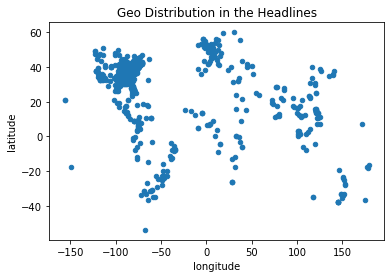

In [32]:
# PLOT YOUR DATA
data.plot.scatter(x="longitude", y="latitude", title="Geo Distribution in the Headlines")
plt.show()

  As final step only keep the following columns

In [33]:
df1[['headline', 'city', 'latitude', 'longitude', 'countrycode']].head(10)

,headline,city,latitude,longitude,countrycode
0,Zika Outbreak Hits Miami,Miami,25.77427,-80.19366,US
1,Could Zika Reach New York City?,New York City,40.71427,-74.00597,US
2,First Case of Zika in Miami Beach,Miami,25.77427,-80.19366,US
3,"Mystery Virus Spreads in Recife, Brazil",Recife,-8.05389,-34.88111,BR
4,Dallas man comes down with case of Zika,Dallas,32.78306,-96.80667,US
5,Trinidad confirms first Zika case,Trinidad,-14.83333,-64.90000,BO
6,Zika Concerns are Spreading in Houston,Houston,29.76328,-95.36327,US
7,Geneve Scientists Battle to Find Cure,Geneve,46.20222,6.14569,CH
8,The CDC in Atlanta is Growing Worried,Atlanta,33.74900,-84.38798,US
9,Zika Infested Monkeys in Sao Paulo,Sao Paulo,-23.54750,-46.63611,BR


This dataframe is the final outcome from this section. We will use it to cluster headlines based on the geographic location in the next section.

## Saving Data

Let's save the final processed dataframe to a csv file for easy input and output with Pandas.

In [34]:
data.to_csv('/Users/chen/Desktop/project3/processed_headlines_locations.csv')

# Summary

In this notebook you:

* Read the parsed headlines into a dataframe
* Found the location of the cities mentioned in the headlines
* Kept the largest city if a city was in geonames multiple times
* Joined the cities to the headlines 
* Cleaned up the final dataframe to only headlines with a location

The end deliverable is a dataframe containing the headline, the city mentioned in the headline, the location of the city, and the population of the city. We can move on to clustering and visualizing the headline locations in the next section!  
  
  Submit this notebook in the Blackboard.